/Users/lizhe/anaconda3/envs/stock/lib/python3.7/site-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


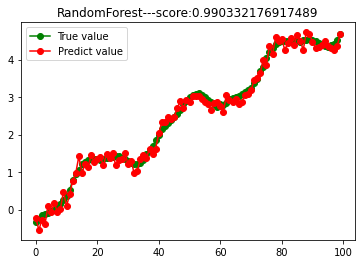

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble


def gen_data(x1, x2):
    # 生成数据
    y = np.sin(x1) * 0.1 + np.cos(x2) * 0.4 + 0.1 * x1
    return y


def load_data():
    x1_train = np.linspace(0, 50, 500)
    x2_train = np.linspace(-10, 10, 500)
    data_train = np.array(
        [[x1, x2, gen_data(x1, x2) + np.random.random(1) - 0.5] for x1, x2 in zip(x1_train, x2_train)])
    x1_test = np.linspace(0, 50, 100) + np.random.random(100) * 0.5
    x2_test = np.linspace(-10, 10, 100) + 0.02 * np.random.random(100)
    data_test = np.array([[x1, x2, gen_data(x1, x2)] for x1, x2 in zip(x1_test, x2_test)])
    return data_train, data_test


train, test = load_data()
# train的前两列是x1,X2，后一列是y，这里的y有随机噪声
x_train, y_train = train[:, :2], train[:, 2]
x_test, y_test = test[:, :2], test[:, 2]  # 测试时y没有噪声

random_forest_regressor = ensemble.RandomForestRegressor(n_estimators=20)  # 随机森林回归,并使用20个决策树
random_forest_regressor.fit(x_train, y_train)  # 拟合模型
score = random_forest_regressor.score(x_test, y_test)
result = random_forest_regressor.predict(x_test)
plt.figure()
plt.plot(np.arange(len(result)), y_test, "go-", label="True value")
plt.plot(np.arange(len(result)), result, "ro-", label="Predict value")
plt.title(f"RandomForest---score:{score}")
plt.legend(loc="best")
plt.show()